In [1]:
#Analisis de recursos
!pip install memory-profiler
!pip install psutil
#Instalacion de modulos
!pip install pyspark

ERROR: Could not find file C:\Users\JC\AppData\Local\Temp\ipykernel_9680\458147452.py


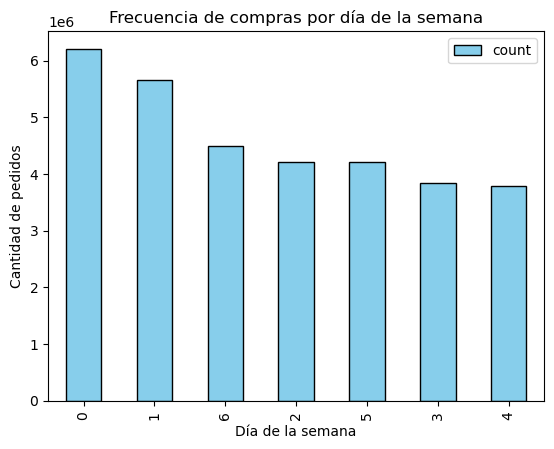

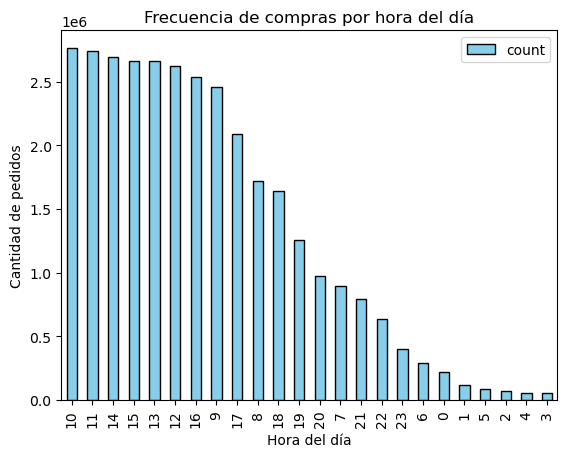

Tiempo de ejecución: 86.69066214561462 segundos
Uso de CPU: 75.7%
Uso de memoria: 47.8%


In [2]:
#Analisis de recursos
import time
import psutil
from memory_profiler import profile


#Importar modulos
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count
#Modulo para visualizacion de datos
import matplotlib.pyplot as plt
# Cargar la extensión memory_profiler
%load_ext memory_profiler
start_time = time.time()

#Variables de recursos
@profile

def profiler():
    # Crear una sesión de Spark
    spark = SparkSession.builder.appName("Proyecto_Evaluacion").getOrCreate()
    
    # Cargar los datos en DataFrames de Spark
    df_department = spark.read.csv('data/departments.csv', header=True, inferSchema=True)
    df_order_products = spark.read.csv('data/order_products__prior.csv', header=True, inferSchema=True)
    df_orders = spark.read.csv('data/orders.csv', header=True, inferSchema=True)
    df_products = spark.read.csv('data/products.csv', header=True, inferSchema=True)
    
    #Eliminar atributos
    df_orders = df_orders.drop('eval_set')
    df_orders = df_orders.drop('days_since_prior_order')
    df_products = df_products.drop('aisle_id')
    df_order_products = df_order_products.drop('reordered')
    
    #Unir los datos
    data = df_orders.join(df_order_products, "order_id").join(df_products, "product_id").join(df_department, "department_id")
    
    # Calcular la frecuencia de compras por día
    orden_x_dia_sp = data.groupBy('order_dow').count().orderBy('count', ascending=False)
    orden_x_dia_pd = orden_x_dia_sp.toPandas()
    orden_x_dia_pd.set_index('order_dow', inplace=True)
    
    # Visualizar la frecuencia de compras por día
    orden_x_dia_pd.plot(kind='bar', title='Frecuencia de compras por día de la semana', edgecolor='black', color='skyblue')
    plt.xlabel('Día de la semana')
    plt.ylabel('Cantidad de pedidos')
    plt.show()
    
    # Calcular la frecuencia de compras por hora
    orden_x_hora_sp = data.groupBy('order_hour_of_day').count().orderBy('count', ascending=False)
    orden_x_hora_pd = orden_x_hora_sp.toPandas()
    orden_x_hora_pd.set_index('order_hour_of_day', inplace=True)
    
    # Visualizar la frecuencia de compras por hora
    orden_x_hora_pd.plot(kind='bar', edgecolor='black', color='skyblue')
    plt.title('Frecuencia de compras por hora del día')
    plt.xlabel('Hora del día')
    plt.ylabel('Cantidad de pedidos')
    plt.xticks(range(24))
    plt.show()
    pass

profiler()

end_time = time.time()

print(f"Tiempo de ejecución: {end_time - start_time} segundos")
print(f'Uso de CPU: {psutil.cpu_percent()}%')
print(f'Uso de memoria: {psutil.virtual_memory().percent}%')